# Microsoft Movie Studio Business Project

**Authors:** Marcelo Scatena
***
## Overview

Microsfot is creating a movie studio and wants business recommendations for it. The Box Office Movies Gross database can give us information on which movies have done better worldwide than others. After the data cleaning, the results show us a big rise on franchise blockbuster movies, and the recommendation to Microsoft would be to start it's own movie franchise.

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

From the database used in this part, the relevant questions to be answered are:
* Which are the top grossing movies worldwide?
* What genres are those movies?
* What movie studio is is featured more often in the top grossing movies?
***

## Data Understanding

The data was aquired from Imdb database, containing information on the Studio, Domestic and Foreign Gross of each of over three thousand movies from 2010 to 2018.
From this we can extract the highest grossing movies made in that period.
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
gross_df = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')

In [3]:
gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## Data Preparation

This database had to be cleaned to be used. There are NaN values in the Studio, Domestic and Foreign gross columns. 
The Foreign Gross column has all values above on billion as a string with a comma and a dot inside.
***
* The movies with NaN values from the Studio column were dropped because their information was not relevant to our questions.
* The Domestic Gross and Foreign Gross NaN values were kept as Zeroes since they don't overlap and the other value can give important insight to data set. The zeroes can be omited in  vizualization.
* We cleaned Foreign Gross columns that had objects in it, corrected the values, and change them and the Domestic Gross columns to Int.

### Dropping Studio NaN values:

In [5]:
gross_df[gross_df['studio'].isna()]

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000,2010
555,Fireflies in the Garden,NaN,70600.0,3300000,2011
933,Keith Lemon: The Film,NaN,NaN,4000000,2012
1862,Plot for Peace,NaN,7100.0,NaN,2014
2825,Secret Superstar,NaN,NaN,122000000,2017


In [6]:
gross_df.dropna(subset=['studio'], inplace=True)

In [7]:
gross_df['studio'].isna().any()

False

### Filling the rest of the NaN values with 0 for ease of column manipulation:

In [8]:
gross_df.fillna(0, inplace=True)

In [9]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   object 
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.5+ KB


In [10]:
gross_df.isna().any()

title             False
studio            False
domestic_gross    False
foreign_gross     False
year              False
dtype: bool

###  Cleaning Foreign Gross and changing it's type Objec into Int, and Domestic Gross into Int:

In [11]:
def clean_str(x):
    '''
    Takes a string that has commas ',' or dots '.' in it, strips them, multiply them by a thousand to adjust their value.
    The only strings with this caracteristics were gross values of over one billion.
    
    Input: string
    Output: string stripped, joined and corrected to a billion.
    '''
    if x:
        if ',' in x:
            x = x.split(',')
            x = ''.join(x)
            x = x.split('.')
            x = ''.join(x)
            x = int(x)
            x = x * 100000
            x = str(x)
            return x
        else:
            return x
    else:
        return x

In [12]:
gross_df['foreign_gross'] = gross_df['foreign_gross'].apply(str)
gross_df['foreign_gross'] = gross_df['foreign_gross'].apply(clean_str)
gross_df['foreign_gross'] = gross_df['foreign_gross'].apply(int)
gross_df['domestic_gross'] = gross_df['domestic_gross'].apply(int)

In [13]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3382 non-null   object
 1   studio          3382 non-null   object
 2   domestic_gross  3382 non-null   int64 
 3   foreign_gross   3382 non-null   int64 
 4   year            3382 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 158.5+ KB


## Data Modeling
Here the Domestic Gross and Foreign Gross were combined, since we are interested in the Total Worldwide Gross.
Tables were created featuring the Top 10 Highest Grossing Movies, the Highest Grossing Movie per year and the Top 5 Studios with Highest Overall Gross. These can give us ideas not only on types of movies Microsoft could make, but business partners and overall trend over time.

### Creating Total Gross column:

In [14]:
gross_df['total_gross'] = gross_df['domestic_gross'] + gross_df['foreign_gross']

In [15]:
gross_df.sort_values(by='total_gross', ascending=False)[:10]

,title,studio,domestic_gross,foreign_gross,year,total_gross
1872,Star Wars: The Force Awakens,BV,936700000,1131600000,2015,2068300000
3079,Avengers: Infinity War,BV,678800000,1369500000,2018,2048300000
1873,Jurassic World,Uni.,652300000,1019400000,2015,1671700000
727,Marvel's The Avengers,BV,623400000,895500000,2012,1518900000
1874,Furious 7,Uni.,353000000,1163000000,2015,1516000000
1875,Avengers: Age of Ultron,BV,459000000,946400000,2015,1405400000
3080,Black Panther,BV,700100000,646900000,2018,1347000000
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000,960500000,2011,1341500000
2758,Star Wars: The Last Jedi,BV,620200000,712400000,2017,1332600000
3081,Jurassic World: Fallen Kingdom,Uni.,417700000,891800000,2018,1309500000


In [92]:
gross_df[gross_df['title'].str.contains('Star Wars')]

,title,studio,domestic_gross,foreign_gross,year,total_gross
793,Star Wars: Episode I - The Phantom Menace (in 3D),Fox,43500000,59300000,2012,102800000
1872,Star Wars: The Force Awakens,BV,936700000,1131600000,2015,2068300000
2323,Rogue One: A Star Wars Story,BV,532200000,523900000,2016,1056100000
2758,Star Wars: The Last Jedi,BV,620200000,712400000,2017,1332600000
3101,Solo: A Star Wars Story,BV,213800000,179200000,2018,393000000


In [17]:
gross_df[gross_df['title'].str.contains('Harry Potter')]

,title,studio,domestic_gross,foreign_gross,year,total_gross
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010,960300000
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000,960500000,2011,1341500000


In [93]:
gross_df[gross_df['studio'].str.contains('DW')].sort_values(by=['total_gross'], ascending=False)[:30]

,title,studio,domestic_gross,foreign_gross,year,total_gross
329,Transformers: Dark of the Moon,P/DW,352400000,771400000,2011,1123800000
4,Shrek Forever After,P/DW,238700000,513900000,2010,752600000
734,Madagascar 3: Europe's Most Wanted,P/DW,216400000,530500000,2012,746900000
333,Kung Fu Panda 2,P/DW,165200000,500400000,2011,665600000
338,Puss in Boots,P/DW,149300000,405700000,2011,555000000
9,How to Train Your Dragon,P/DW,217600000,277300000,2010,494900000
17,Megamind,P/DW,148400000,173500000,2010,321900000
752,Rise of the Guardians,P/DW,103400000,203500000,2012,306900000
71,Dinner for Schmucks,P/DW,73000000,13800000,2010,86800000
865,A Thousand Words,P/DW,18500000,3600000,2012,22100000


### Extracting Title and Total Gross value from top 10 highest grossing movies:

In [47]:
height_top10_gross = sorted(gross_df.sort_values(by='total_gross', ascending=False)[:10]['total_gross'].tolist())
x_top10_gross = gross_df.sort_values(by='total_gross', ascending=False)[:10]['title'].values.tolist()
x_top10_gross.reverse()

### Setting values in Billions of dollars for easier visualization:

In [48]:
for i in range(len(height_top10_gross)):
    height_top10_gross[i] /= 1000000000

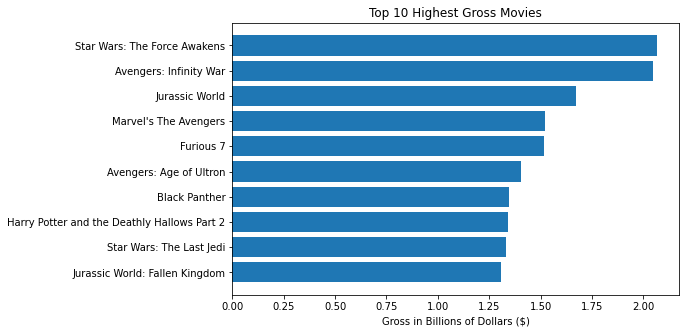

In [49]:
fig, ax = plt.subplots(figsize=(8,5))

ax.barh(x_top10_gross, height_top10_gross)
ax.set_title('Top 10 Highest Gross Movies')
ax.set_xlabel('Gross in Billions of Dollars ($)');

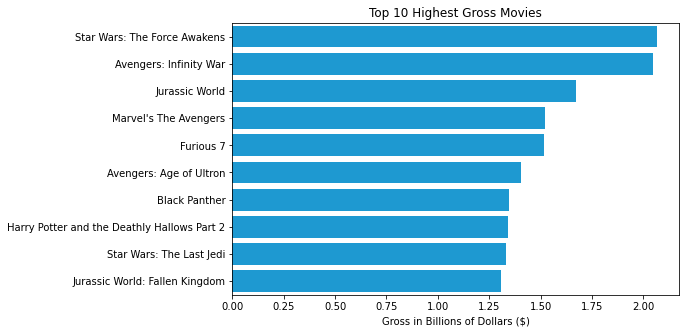

In [87]:
fig, ax = plt.subplots(figsize=(8,5))
# x_top10_gross.reverse()
# height_top10_gross.reverse()
# clrs = ['grey' if gross_df[gross_df['studio'].str.contains('BV')] else 'red' for x in x_top10_gross]

barplot = sns.barplot(x=height_top10_gross, y=x_top10_gross, data=gross_df, color='#00A4EF')
barplot.set(title='Top 10 Highest Gross Movies', xlabel='Gross in Billions of Dollars ($)');

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
# x_top10_gross.reverse()
# height_top10_gross.reverse()
# clrs = ['grey' if gross_df[gross_df['studio'].str.contains('BV')] else 'red' for x in x_top10_gross]

barplot = sns.barplot(x=height_top10_gross, y=x_top10_gross, data=gross_df, color='#7FBA00')
barplot.set(title='Top 10 Highest Gross Movies', xlabel='Gross in Billions of Dollars ($)');

In [22]:
gross_df.groupby(['studio'])['total_gross'].max().sort_values()[-5:]

studio
Sony    1108600000
P/DW    1123800000
WB      1341500000
Uni.    1671700000
BV      2068300000
Name: total_gross, dtype: int64

In [23]:
height_studio_max = gross_df.groupby(['studio'])['total_gross'].max().sort_values()[-5:].values

In [24]:
x_studio_max = gross_df.groupby(['studio'])['total_gross'].max().sort_values()[-5:].index

In [25]:
for i in range(len(height_studio_max)):
    height_studio_max[i] /= 1000000

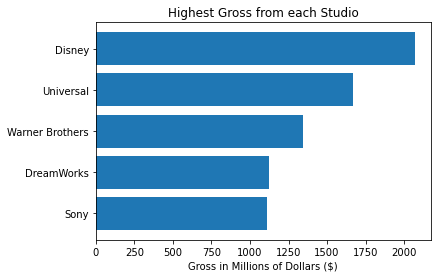

In [26]:
fig, ax = plt.subplots()

studios = ('Sony', 'DreamWorks', 'Warner Brothers', 'Universal', 'Disney')

ax.barh(x_studio_max, height_studio_max)
ax.set_title('Highest Gross from each Studio')
ax.set_xlabel('Gross in Millions of Dollars ($)')
ax.set_yticks(np.arange(len(studios)))
ax.set_yticklabels(studios);

In [27]:
height_year_total = gross_df.groupby(['year'])['total_gross'].max().sort_values().values

In [28]:
x_year_total = gross_df.groupby(['year'])['total_gross'].max().sort_values().index

In [29]:
for i in range(len(height_year_total)):
    height_year_total[i] /= 1000000

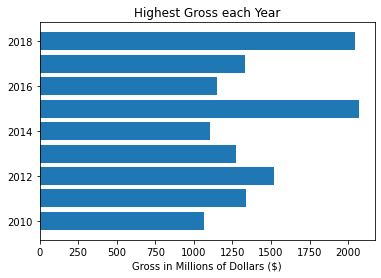

In [30]:
fig, ax = plt.subplots()

ax.barh(x_year_total, height_year_total)
ax.set_title('Highest Gross each Year')
ax.set_xlabel('Gross in Millions of Dollars ($)');

## Evaluation
This data shows That Disney is currently making the highest grossing movies nowadays.
The top10 high gross movies are all franchise movies. There's the Star Wars franchise, Avengers franchise, Jurassic Park franchise, Fast and Furious franchise and Harry Potter franchise.
The highest gross movie per year have not offered extra insights in the data.
Since the franchises these movies are a part of are not new (all of them have over 10 years of movies), we cold assume an extrapolation of the data would give similar results.
***

## Conclusions
The data for only the last eight years is limited, but if one is looking to make a big box office movie in the next few years, the data from over a decade ago might be less relevant for decision making.
This data needs to be cross referenced with others for us to make more thorough points.
As of now I'd recommend picking a franchise that have not yet debuted in the cinemas get their IP
(Broken Earth trilogy, The A Throne Of Glass Series, Red Queen).
***